In [8]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
from scipy.signal import convolve2d


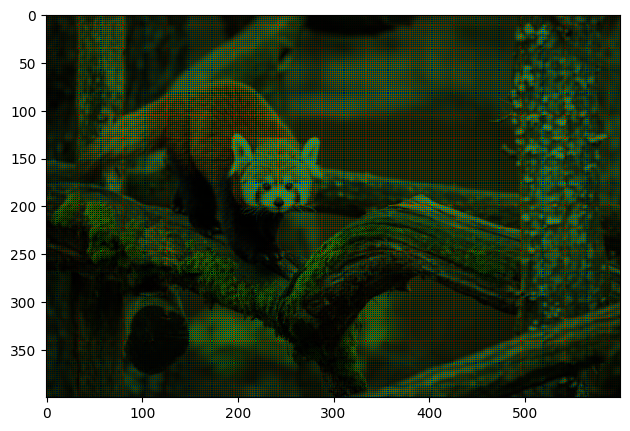

In [ ]:
#Ładowanie obrazu przed demozaikowaniem jako numpy array
image = np.load('/content/pandas.npy')
#Wyświetlenie pierwszych 4 kolumn i 4 wierszy każdago kanału obrazu

#Czerwony (prawy górny)
image[:4, :4, 0]
#Zielony (lewy górny, i prawy dolny)
image[:4, :4, 1]
# #Niebieski (lewy dolny)
image[:4, :4, 2]


#example_color_image = np.array([[  [255(red), 0(green), 0(blue)],[0(red), 255(green), 0(blue)],[0(red), 0(green), (blue)255]],
#                         [ [R, G, B],   [R, G, B], [R, G, B]],
#                         [ [R, G, B],  [R, G, B],  [R, G, B]]])
io.imshow(image)

In [ ]:
#Poszczególne kanały przypisujemy do zmiennej
green = image[:, :, 1]
red = image[:, :, 0]
blue = image[:, :, 2]

In [ ]:
#Stworzenie 1 wymiarowej tablicy, która zawiera liczby od 0 do 9
#i następnie wybierany jest co drugi element
#result: array([1, 3, 5, 7, 9])
np.arange(10)[1::2]

array([1, 3, 5, 7, 9])

In [ ]:
to_interp = green
#Wybieramy co drugi wiersz z tablicy green (wszystkie kolumny są uwzględnione)
to_interp = green[::2,:]
#Wybieramy co drugą kolumne z tablicy
to_interp = to_interp[:, ::2]
#Rezultetm jest tabliza zawierająca co drugi wiersz i co drugą kolumnę  q

In [ ]:
#Tworzymy liniowe jądro interpolacji
def linear_kernel(x, offset: float, width: float):
    return (1 - np.abs((x - offset) / width)) * (np.abs((x - offset) / width) < 1)

In [ ]:
#Tworzymy jednowymiarową tablice od -3 do 3
# zawierającą równo rozłożone 1000 punktów
x = np.linspace(-3, 3, 1000)
y = linear_kernel(x, offset=0.0, width=1)

to_interp[0].shape

(300,)

#Sekcja interpolacji wierszy

In [ ]:
#Definujemy funkcję interpolującą wiersz
def interpolate_row(row):
  #Tworzymy pustą tablicę kernels
    kernels = []

  #Tworzymy jednowymiarową listę od 0 do 1, z ilością punktów 2* długość(przyjęty argument row)
  #(chcemy uzyskać gęstsze próbkowanie niż oryginalne wartości w row)
    space = np.linspace(0, 1, 2 * len(row))

# iteracja przez elementy row i przestrzeń space
    for x, y in zip(space.tolist(), row.tolist()):
        kernel = linear_kernel(space, offset=2 * x, width=1 / len(row))
        kernels.append(y * kernel)

    return space, np.sum(np.asarray(kernels), axis=0)

In [ ]:
#Initjalizacja punstej listy
iterpolated = []

#Przechodzimy przez każdy wiersz w to_interp, i dla każdego wiersza
# wywoływana jest funkcja interpolate_row(), i zinterpolowane wartości są dodawane do listy intepolated
for row in to_interp:
    _, i = interpolate_row(row)
    iterpolated.append(i)

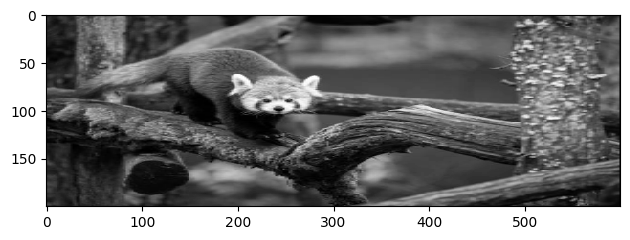

In [ ]:
#Przekształcamy zdefinowaną listę, na numpy array
iterpolated = np.asarray(iterpolated)
io.imshow(iterpolated)

#Sekcja interpolacji kolumn

In [ ]:
iterpolated2 = []

for column in iterpolated.T:
    _, i = interpolate_row(column)
    iterpolated2.append(i)

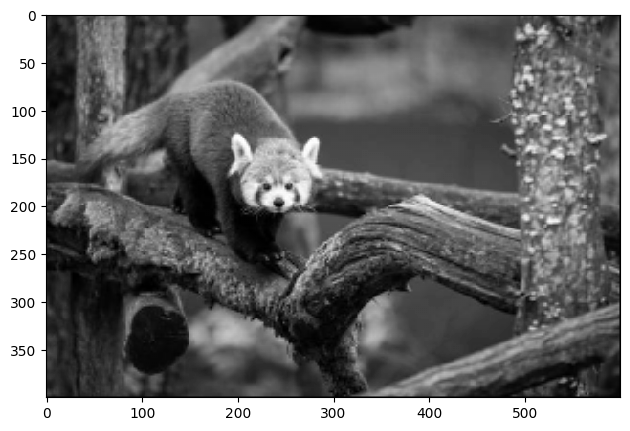

In [ ]:
iterpolated2 = np.asarray(iterpolated2).T
io.imshow(iterpolated2)


In [ ]:
result_green = iterpolated2

#Sekcja interpolacji wierszy dla koloru czerwonego




In [ ]:
red_row_inter = []
for row in red[::2]:
    _, i = interpolate_row(row[1::2])
    red_row_inter.append(i)

red_row_inter = np.asarray(red_row_inter)
red_row_inter.shape

(200, 600)

#Sekcja interpolacji kolumn dla koloru czerwonego


In [ ]:
red_col_inter = []
for col in red_row_inter.T:
    _, i = interpolate_row(col)
    red_col_inter.append(i)

red_col_inter = np.asarray(red_col_inter)
red_col_inter.T.shape

(400, 600)

#Przypisanie końcowego wyniku do result_red

In [ ]:
result_red = red_col_inter


#Sekcja interpolacji wierszy dla koloru niebieskiego







In [ ]:
blue_row_inter = []
for row in blue[1::2]:
    _, i = interpolate_row(row[::2])
    blue_row_inter.append(i)

blue_row_inter = np.asarray(blue_row_inter)
blue_row_inter.shape

(200, 600)

#Sekcja interpolacji kolumn dla koloru niebieskiego


In [ ]:
blue_col_inter = []
for col in blue_row_inter.T:
    # print(col)
    # break
    _, i = interpolate_row(col)
    blue_col_inter.append(i)

blue_col_inter = np.asarray(blue_col_inter)
blue_col_inter.T.shape

(400, 600)

#Przypisanie końcowego wyniku do result_blue

In [ ]:
result_blue = blue_col_inter

Sprawdzenie, czy wymiary każdej warstwy koloru są poprawne

In [ ]:
result_red.shape, result_green.T.shape, result_blue.shape

((600, 400), (600, 400), (600, 400))

In [ ]:
#Funkcja służąca do łączenia tablic. W naszym przypadku do jednej trójwymiarowej tablicy reprezentującej
#kolorowy obraz
result_image = np.dstack([result_red.T, result_green, result_blue.T])

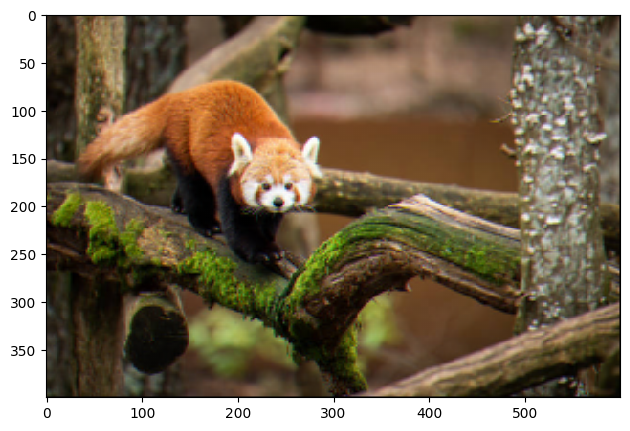

In [ ]:
io.imshow(result_image)

#Demozaikowanie przy użyciu konwolucji

In [49]:
import numpy as np
from skimage import io
from scipy.ndimage import convolve
from scipy.signal import convolve2d
from matplotlib import pyplot as plt
from PIL import Image as im



#Nowy kod


(-0.5, 599.5, 399.5, -0.5)

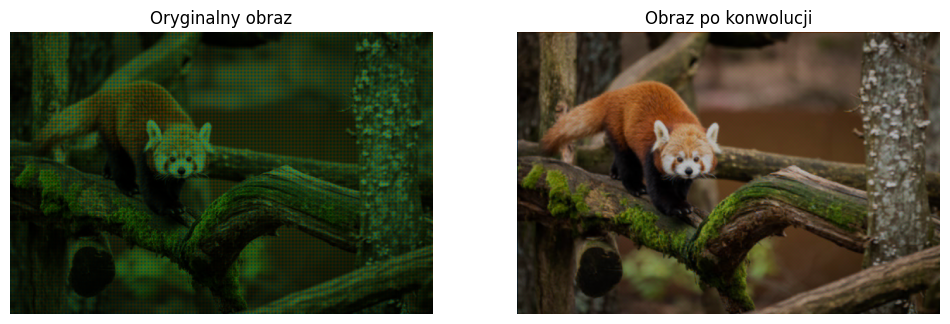

In [55]:
kernel = np.array([[4, 2],[2, 4]])/4


image = np.load('/content/pandas.npy')

def manual_convolution(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape[:2]

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)), 'constant')

    output_image = np.zeros_like(image)

    for y in range(image_height):
        for x in range(image_width):
            for c in range(3):  # Przechodzenie przez każdy kanał kolorów (RGB)
                conv_value = np.sum(kernel * padded_image[y:y+kernel_height, x:x+kernel_width, c])
                if c == 1:  # Jeśli kanał jest zielony, podziel wartość przez 2
                    conv_value /= 2
                output_image[y, x, c] = conv_value

    return output_image

# Wykonanie konwolucji ręcznie
manual_convoluted_image = manual_convolution(image, kernel)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Oryginalny obraz")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Obraz po konwolucji")
plt.imshow(manual_convoluted_image)
plt.axis('off')



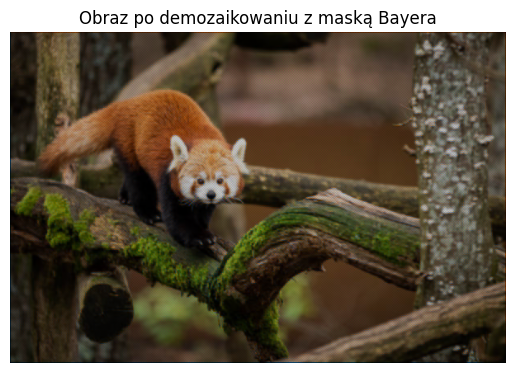

In [44]:

image = np.load('/content/pandas.npy')

# Normalizacja, aby suma wag wynosiła 1
bayer_mask = bayer_mask / np.sum(bayer_mask)

# Zastosowanie maski Bayera dla konwolucji z jądrem uśredniającym
def apply_bayer_mask(image):

    # Definiowanie jądra uśredniającego z wagami dla maski Bayera
    # Zielone piksele są bardziej liczne, więc ich waga jest mniejsza (2)
    # Czerwone i niebieskie piksele są mniej liczne, więc ich waga jest większa (4)

    kernel = np.array([[4, 2], [2, 4]])/4

    # Zastosowanie konwolucji do każdego kanału koloru z osobnym jądrem
    red_channel = convolve2d(image[..., 0], kernel)
    green_channel = convolve2d(image[..., 1], kernel/2)  # Zielony ma wzmocnienie 2
    blue_channel = convolve2d(image[..., 2], kernel)

    # Składanie kanałów w jeden obraz
    demosaiced_image = np.stack((red_channel, green_channel, blue_channel), axis=-1)

    # Normalizacja obrazu do zakresu 0-255
    # demosaiced_image = np.clip(demosaiced_image, 0, 255).astype('uint8')

    return demosaiced_image

# Stosowanie maski Bayera i konwolucji na obrazie z mozaiką
demosaiced_bayer = apply_bayer_mask(image)

# Wyświetlenie wynikowego obrazu
plt.imshow(demosaiced_bayer)
plt.title("Obraz po demozaikowaniu z maską Bayera")
plt.axis('off')
plt.show()

Fuji - CDN. ()

#Wyostrzanie

In [ ]:
import cv2
example_image = io.imread('/content/Bison.jpg')



# Definiowanie jądra dla konwolucji
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# Stosowanie konwolucji na obrazie
sharpened_image = cv2.filter2D(example_image, -1, kernel)

# Wyświetlenie oryginalnego i wyostrzonego obrazu
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(example_image)
plt.title("Oryginalny Obraz")

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image)
plt.title("Obraz po Wyostrzeniu")

plt.show()



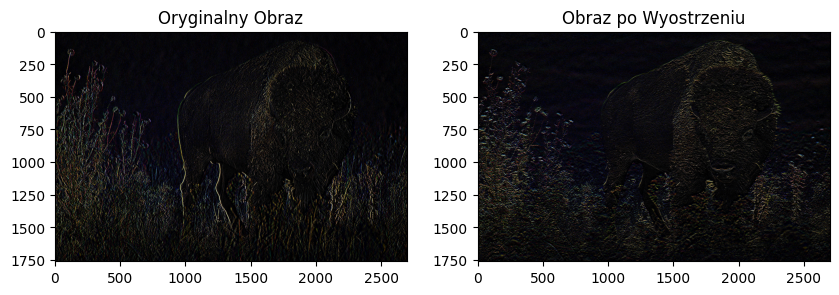

In [117]:
import cv2
example_image = io.imread('/content/Bison.jpg')

kernel_1 = np.array([ [1, 0, -1],
                      [2, 0, -2],
                      [1, 0, -1]] )

kernel_2 = np.array([ [ 1, 2, 1],
                      [ 0, 0, 0],
                      [-1,-2,-1]] )

kernel_3 = np.array([ [ 1, 2, 1],
                      [ 0, 0, 0],
                      [-1,-2,-1]] )



# Stosowanie konwolucji na obrazie
Edge1 = cv2.filter2D(example_image, -1, kernel_1)
Edge2 = cv2.filter2D(example_image, -1, kernel_2)
# Wyświetlenie oryginalnego i wyostrzonego obrazu
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(Edge1)
plt.title("Oryginalny Obraz")

plt.subplot(1, 2, 2)
plt.imshow(Edge2)
plt.title("Obraz po Wyostrzeniu")

plt.show()
